In [4]:
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import heapq
import nltk.data
import csv
import numpy as np
import pandas as pd
import math
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ines\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#read the lyrics.csv
# the lyrics and scores are empty for new songs, they have to be filled first
df = pd.read_csv('Lyrics.csv',delimiter=";",encoding='latin1')
print(df)

                  Song Title                                          Artist  \
0              Feel So Close                                   Calvin Harris   
1          Turn Up the Music                                     Chris Brown   
2       Club Can't Handle Me                          Flo Rida, David Guetta   
3              Rain in Ibiza  Felix Jaehn, The Stickmen Project, Calum Scott   
4                   Believer                                 Imagine Dragons   
..                       ...                                             ...   
234  2 Be Loved (Am I Ready)                                           Lizzo   
235                 Geronimo                                        Sheppard   
236                     Body                             Loud Luxury, Brando   
237                   My Way                                   Calvin Harris   
238            We Don't Care                               Sigala, The Vamps   

     Lyrics  bpm  Push myself score  Ha

In [6]:
# API Call for lyrics. 
# Don't always run it for all songs, as the API only allows 100 calls per day. 
# Therefore put i on the first line with empty lyrics
i = 0
from lyricsgenius import Genius
token = 'Wbdl4zQaphgb0HpfLCqJuhJWNU2B2m7NDXTh3oN9TE5bmM77K1fS68czEbS_wSHy'
genius = Genius(token)
songs =[]
for artist in df.loc[:,"Artist"]:
    if i>=0 : #put here the first empty line
        print('Start')
        while True:
            try:
                song = genius.search_song(df.loc[i]['Song Title'],artist)
                break
            except:
                pass
        df.at[i,'Lyrics'] = song.lyrics
    i+= 1
#print(artists[1].lyrics)   

Start
Searching for "Feel So Close" by Calvin Harris...
Done.
Start
Searching for "Turn Up the Music" by Chris Brown...
Done.
Start
Searching for "Club Can't Handle Me" by Flo Rida, David Guetta...
Done.
Start
Searching for "Rain in Ibiza" by Felix Jaehn, The Stickmen Project, Calum Scott...
Done.
Start
Searching for "Believer" by Imagine Dragons...
Done.
Start
Searching for "Mama Said" by Lukas Graham...
Done.
Start
Searching for "2U" by David Guetta, Justin Biber...
Done.
Start
Searching for "Not Afraid" by Eminem...
Done.
Start
Searching for "Dance With Somebody" by Mando Diao...
Done.
Start
Searching for "On the Floor" by Jennifer Lopez, Pitbull...
Searching for "On the Floor" by Jennifer Lopez, Pitbull...
Searching for "On the Floor" by Jennifer Lopez, Pitbull...
Done.
Start
Searching for "Blinding Lights" by The Weeknd...
Done.
Start
Searching for "Pon de Replay" by Rihanna...
Done.
Start
Searching for "Since U Been Gone" by Kelly Clarkson...
Done.
Start
Searching for "Pump It" b

Done.
Start
Searching for "Try again" by Aaliyah...
Done.
Start
Searching for "Fighter" by Christina Aguilera...
Done.
Start
Searching for "It's My Life" by Bon Jovi...
Searching for "It's My Life" by Bon Jovi...
Done.
Start
Searching for "Beatiful Day" by U2...
Done.
Start
Searching for "Freedom" by Beyoncé, Kendrick Lamar...
Done.
Start
Searching for "Party in the U.S.A." by Miley Cyrus...
Done.
Start
Searching for "Level UP" by Ciara...
Done.
Start
Searching for "Wake me Up" by Avicii...
Done.
Start
Searching for "Shape of You" by Ed Sheeran...
Searching for "Shape of You" by Ed Sheeran...
Searching for "Shape of You" by Ed Sheeran...
Done.
Start
Searching for "Motivation" by Normani...
Done.
Start
Searching for "Titanium" by David Guetta, Sia...
Done.
Start
Searching for "Play Hard" by David Guetta, Ne-Yo, Akon...
Done.
Start
Searching for "Sexy and I know it" by LMFAO...
Searching for "Sexy and I know it" by LMFAO...
Done.
Start
Searching for "Shots" by LMFAO...
Done.
Start
Search

Done.
Start
Searching for "You Know You Like It" by DJ Snake, AlunaGeorge...
Done.
Start
Searching for "Stitches - Seeb Remix" by Shawn Mendes, Seeb...
Done.
Start
Searching for "Say Nothing" by Flume, MAY-A...
Done.
Start
Searching for "Alive" by RÜFÜS DU SOL...
Done.
Start
Searching for "On My Knees" by RÜFÜS DU SOL...
Done.
Start
Searching for "How Long" by Bag Raiders, Panama...
Done.
Start
Searching for "Charlie" by Tones And I...
Done.
Start
Searching for "Never Felt A Love Like This (with Hook N Sling) [feat. Dotan]" by Galantis, Hook N Sling, Dotan...
Done.
Start
Searching for "Show Business" by Hilltop Hoods, Eamon...
Done.
Start
Searching for "See You In My Dreams" by Daya...
Done.
Start
Searching for "Cold Feet" by Loud Luxury...
Done.
Start
Searching for "NUMB" by Hayden James, GRAACE...
Done.
Start
Searching for "Better Than Ever" by Flight Facilities, Aloe Blacc...
Done.
Start
Searching for "Love to Go" by Lost Frequencies, Zonderling, Kelvin Jones...
Done.
Start
Searchin

In [7]:
# Here the new lyrics are written to the file more_lyric.csv. 
# Either change this to write to lyrics.csv or copy-paste. 
# This was only the test phase so far.
df.to_csv('more_lyrics.csv',sep=';',encoding='utf-8-sig')

In [8]:
#lookup line for finding errors
print(df.iloc[236]['Song Title'])

Geronimo


In [42]:
#scores for our categories
#TODO
push_myself ={'push','strive','grind','plod','labor','moil','strain','tug','speed','rocket','opportunities','opportunity','hard','shouting','stopping','force','pain','believer','limit','sky','shit','fuck','unstoppable','pump','adrenaline'}
have_fun = {'fun','happy','fancy','savor','enjoy','good','great','awesome','amazing','nice','sweet','fantastic','sunshine','dancing','alive','dance','party','dj','music','sex','whoop','tickle','clowns','club'}
stress_relief = {'stress', 'relief','stressless','stressfree','reduction','alright','kind','sleep','breathe','breathing','time','love','kiss','sun','stars','moon','sky'}
relax_focus={'relax','focus','focused','focusing','focussed','focussing','relaxation','recreation','relaxing','relaxed','recreational','unwind','unwinding','de-stressing','soothe','soothing','eased','ease','dream','fairy','paradise','beautiful','mind','butterflies','concentrate','concentration','chill','chilling','chillin','chilled'}
get_motivated ={'motivation','motivating','motivated','motivate','motifing','animate','animating','animated','encouraging','encourage','encouraged','exciting','inspiring','inspire','inspired','inspirational','stirring','exhilarating','uplifting','winning','win','winner','easy','survive','tiger','work','countdown'}

In [9]:
#counters for statistics
push_myself_counter= 0
have_fun_counter = 0
stress_relief_counter = 0
relax_focus_counter = 0
get_motivated_counter = 0

In [45]:

def summerise(input, i):
    scoresAr = [[],[],[],[],[]] #push myself, have fun, stress relief, relax/focus, motivation
    
    # (1) Convert paragraphs to sentences
    sentence_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sentence_detector.tokenize(input)
    #sentences = nltk.sent_tokenize(input)
    
    # (2) Tokenisation: split sentences to words
    tokenizer = RegexpTokenizer('\w+')
    
    # (3) Preprocessing: lowercase words and remove stopwords
    base_words = [word.lower() for word in tokenizer.tokenize(input)]
    words_fist_step = [word for word in base_words if word not in stopwords.words()]
    
    #TODO
    #processing because of problems with API lyrics. Have a look at them, the problem are the words in [], they distort the statistics
    #This will filter out some common ones, but it is best to use a filter that excludes all words surrounded by square brackets.
    words = [word for word in words_fist_step if word not in ['chorus','lyrics','lyric','guitar solo','solo','verse','verse 1','verse 2','verse 3','verse 4','verse 5','outro','intro','refrain','instrumental','instrumental post-chorus','interlude','bridge','pre chorus','pre-chorus','post-chorus','post chorus','ad lib','ad-lib']]

    # (4) Find Weighted Frequency of Occurence      
    word_frequencies = FreqDist(words)
        
    maximum_frequency = max(word_frequencies.values())

    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
    #print('---------------------------------------------')
    print(word_frequencies.most_common())
    #print('---------------------------------------------')
    #print(word_frequencies.keys())
    for word in word_frequencies.most_common():
        if(word[0] in push_myself):
            scoresAr[0].append(float(word[1]))
        if(word[0] in have_fun):
            scoresAr[1].append(float(word[1] )) 
        if(word[0] in stress_relief):
            scoresAr[2].append(float(word[1]  ) )
        if(word[0] in relax_focus):
            scoresAr[3].append(float(word[1]  ))
        if(word[0] in get_motivated):
            scoresAr[4].append(float(word[1]  ) )
   # print(summary)
    scores = []
    for score in scoresAr:
        if len(score) >0 and np.average(score)>0.01:
            scores.append(np.average(score))
        else:
            scores.append(0)
    print(scores)
    if scores[0]>0:
        global push_myself_counter
        push_myself_counter+= 1
    if scores[1]>0:
        global have_fun_counter
        have_fun_counter+= 1
    if scores[2]>0:
        global stress_relief_counter
        stress_relief_counter+= 1
    if scores[3]>0:
        global relax_focus_counter
        relax_focus_counter+= 1
    if scores[4]>0:
        global get_motivated_counter
        get_motivated_counter+= 1
    print('Push myself score:'+ str(scores[0]))
    print('Have fun score:'+ str(scores[1]))
    print('Stress relief score:'+ str(scores[2]))
    print('Relax / focus score:'+ str(scores[3]))
    print('Get motivated score:'+ str(scores[4]))
    df.at[i,'Push myself score'] = scores[0]
    df.at[i,'Have fun score'] = scores[1]
    df.at[i,'Stress relief score'] = scores[2]
    df.at[i,'Relax / focus score'] = scores[3]
    df.at[i,'Get motivated score'] = scores[4]
    return scores


In [46]:
#Here the processing happens, the scores re calculated, if the are empty so far
i = 0
for song in df.loc[:,"Lyrics"]:
    print ('******** '+df.loc[i]['Song Title']+' ********')
    #if math.isnan(df.loc[i]['Get motivated score']):
    summerise(song, i)
    i+= 1
    #print('*******************************************************')
    print('\n')

******** Feel So Close ********
[('close', 1.0), ('feel', 0.8333333333333334), ('stopping', 0.8333333333333334), ('drop', 0.5), ('force', 0.3333333333333333), ('field', 0.3333333333333333), ('wear', 0.3333333333333333), ('heart', 0.3333333333333333), ('sleeve', 0.3333333333333333), ('big', 0.3333333333333333), ('deal', 0.3333333333333333), ('love', 0.3333333333333333), ('pours', 0.3333333333333333), ('surround', 0.3333333333333333), ('waterfall', 0.3333333333333333), ('translationsportuguêsfeel', 0.16666666666666666), ('1', 0.16666666666666666), ('build', 0.16666666666666666), ('2', 0.16666666666666666), ('like28embed', 0.16666666666666666)]
[0.5833333333333334, 0, 0.3333333333333333, 0, 0]
Push myself score:0.5833333333333334
Have fun score:0
Stress relief score:0.3333333333333333
Relax / focus score:0
Get motivated score:0


******** Turn Up the Music ********
[('turn', 1.0), ('music', 0.4727272727272727), ('woah', 0.45454545454545453), ('hands', 0.32727272727272727), ('dance', 0.327

[('mama', 1.0), ('told', 0.5882352941176471), ('kids', 0.5882352941176471), ('alright', 0.23529411764705882), ('kind', 0.23529411764705882), ('bed', 0.23529411764705882), ('night', 0.23529411764705882), ('daddy', 0.23529411764705882), ('listen', 0.23529411764705882), ('pointing', 0.23529411764705882), ('nasty', 0.23529411764705882), ('fingers', 0.23529411764705882), ('making', 0.23529411764705882), ('fun', 0.23529411764705882), ('dabdadadabdadad', 0.23529411764705882), ('bdaaa', 0.23529411764705882), ('mom', 0.11764705882352941), ('dad', 0.11764705882352941), ('friends', 0.11764705882352941), ('dabdadabdadadbdadabdaaaaa', 0.11764705882352941), ('1', 0.058823529411764705), ('remember', 0.058823529411764705), ('travelled', 0.058823529411764705), ('exotic', 0.058823529411764705), ('lands', 0.058823529411764705), ('visit', 0.058823529411764705), ('summer', 0.058823529411764705), ('ends', 0.058823529411764705), ('buying', 0.058823529411764705), ('clothes', 0.058823529411764705), ('folks', 0

[('dance', 1.0), ('gonna', 0.23943661971830985), ('sing', 0.1267605633802817), ('love', 0.1267605633802817), ('music', 0.11267605633802817), ('falling', 0.11267605633802817), ('favourite', 0.11267605633802817), ('song', 0.11267605633802817), ('night', 0.11267605633802817), ('long', 0.11267605633802817), ('home', 0.028169014084507043), ('1', 0.014084507042253521), ('break', 0.014084507042253521), ('happy', 0.014084507042253521), ('learn', 0.014084507042253521), ('clap', 0.014084507042253521), ('hands', 0.014084507042253521), ('shake', 0.014084507042253521), ('summer', 0.014084507042253521), ('day', 0.014084507042253521), ('2', 0.014084507042253521), ('away', 0.014084507042253521), ('feel', 0.014084507042253521), ('betrayed', 0.014084507042253521), ('sweet', 0.014084507042253521), ('dance1embed', 0.014084507042253521)]
[0, 0.2852112676056338, 0.1267605633802817, 0, 0]
Push myself score:0
Have fun score:0.2852112676056338
Stress relief score:0.1267605633802817
Relax / focus score:0
Get mo

[('time', 1.0), ('breathe', 0.8), ('moving', 0.8), ('hear', 0.6), ('pre', 0.4), ('put', 0.4), ('1', 0.2), ('started', 0.2), ('friends', 0.2), ('cool', 0.2), ('pretend', 0.2), ('dedicated', 0.2), ('long', 0.2), ('called', 0.2), ('pictured', 0.2), ('2', 0.2), ('fell', 0.2), ('stupid', 0.2), ('love', 0.2), ('song', 0.2), ('wanna', 0.2), ('guess', 0.2), ('felt', 0.2), ('chance', 0.2), ('blew', 0.2), ('sight', 0.2), ('mind', 0.2), ('shut', 0.2), ('mouth', 0.2), ('gone29embed', 0.2)]
[0, 0, 0.6666666666666666, 0.2, 0]
Push myself score:0
Have fun score:0
Stress relief score:0.6666666666666666
Relax / focus score:0.2
Get motivated score:0


******** Pump It ********
[('pump', 1.0), ('louder', 0.92), ('turn', 0.56), ('damn', 0.4), ('black', 0.16), ('eyed', 0.16), ('peas', 0.16), ('radio', 0.16), ('blast', 0.16), ('stereo', 0.16), ('wanna', 0.16), ('b', 0.16), ('baby', 0.16), ('shake', 0.16), ('dee', 0.16), ('girl', 0.12), ('joint', 0.12), ('fizzlin', 0.12), ('sizzlin', 0.12), ('adi', 0.12), ('

[('woo', 1.0), ('hoo', 0.8571428571428571), ('feel', 0.7142857142857143), ('heart', 0.42857142857142855), ('alive', 0.42857142857142855), ('dream', 0.2857142857142857), ('beating', 0.2857142857142857), ('make', 0.2857142857142857), ('adventure', 0.21428571428571427), ('turn', 0.21428571428571427), ('magic', 0.21428571428571427), ('away', 0.21428571428571427), ('diamonds', 0.21428571428571427), ('life', 0.21428571428571427), ('umi', 0.14285714285714285), ('day', 0.14285714285714285), ('pressure', 0.14285714285714285), ('weight', 0.14285714285714285), ('underneath', 0.14285714285714285), ('skin', 0.14285714285714285), ('post', 0.14285714285714285), ('taking', 0.14285714285714285), ('shape', 0.14285714285714285), ('lifetime', 0.07142857142857142), ('indecipherable', 0.07142857142857142), ('1', 0.07142857142857142), ('legends', 0.07142857142857142), ('told', 0.07142857142857142), ('2', 0.07142857142857142), ('3', 0.07142857142857142), ('died', 0.07142857142857142), ('light', 0.071428571428

[('push', 1.0), ('satisfaction', 0.6585365853658537), ('touch', 0.2682926829268293), ('lyricspush', 0.024390243902439025), ('likepush', 0.024390243902439025), ('satisfaction6embed', 0.024390243902439025)]
[1.0, 0, 0, 0, 0]
Push myself score:1.0
Have fun score:0
Stress relief score:0
Relax / focus score:0
Get motivated score:0


******** Calabria 2007 (feet Natasja) - Radio Edit ********
[('demo', 1.0), ('feat', 0.36363636363636365), ('2', 0.34265734265734266), ('1', 0.26573426573426573), ('live', 0.2517482517482518), ('mv', 0.2097902097902098), ('remix', 0.2097902097902098), ('version', 0.1888111888111888), ('4', 0.17482517482517482), ('love', 0.17482517482517482), ('3', 0.16083916083916083), ('mixed', 0.13286713286713286), ('7', 0.11888111888111888), ('2017', 0.11188811188811189), ('5', 0.11188811188811189), ('cover', 0.11188811188811189), ('6', 0.1048951048951049), ('pop', 0.0979020979020979), ('8', 0.0979020979020979), ('10', 0.0979020979020979), ('charli', 0.09090909090909091), ('2

[('turn', 1.0), ('roses', 0.45), ('nigga', 0.3), ('fuck', 0.3), ('corner', 0.2), ('baby', 0.2), ('lit', 0.2), ('handle', 0.2), ('behavior', 0.2), ('fast', 0.2), ('life', 0.2), ('raw', 0.2), ('rosé', 0.2), ('wanna', 0.15), ('walked', 0.1), ('body', 0.1), ('screaming', 0.1), ('dolo', 0.1), ('sold', 0.1), ('bag', 0.1), ('pablo', 0.1), ('photo', 0.1), ('gon', 0.1), ('make', 0.1), ('feel', 0.1), ('tony', 0.1), ('killed', 0.1), ('manolo', 0.1), ('walk', 0.1), ('money', 0.1), ('finger', 0.1), ('poppin', 0.1), ('wife', 0.1), ('winter', 0.1), ('nothin', 0.1), ('pull', 0.1), ('flexin', 0.1), ('niggas', 0.1), ('aerobics', 0.1), ('girl', 0.1), ('cute', 0.1), ('ballin', 0.1), ('shit', 0.1), ('gorgeous', 0.1), ('standin', 0.1), ('table', 0.1), ('waters', 0.1), ('god', 0.1), ('imanbek', 0.05), ('remix', 0.05), ('wanna16embed', 0.05)]
[0.2, 0, 0, 0, 0]
Push myself score:0.2
Have fun score:0
Stress relief score:0
Relax / focus score:0
Get motivated score:0


******** Unstoppable ********
[('unstoppable

[('pump', 1.0), ('lyricsyou', 0.017857142857142856), ('upyou', 0.017857142857142856), ('like3embed', 0.017857142857142856)]
[1.0, 0, 0, 0, 0]
Push myself score:1.0
Have fun score:0
Stress relief score:0
Relax / focus score:0
Get motivated score:0


******** Chandelier ********
[('tonight', 1.0), ('holding', 0.8666666666666667), ('gonna', 0.5333333333333333), ('chandelier', 0.5333333333333333), ('drink', 0.4), ('feel', 0.3333333333333333), ('swing', 0.26666666666666666), ('exist', 0.26666666666666666), ('dear', 0.26666666666666666), ('life', 0.26666666666666666), ('open', 0.26666666666666666), ('eyes', 0.26666666666666666), ('glass', 0.26666666666666666), ('full', 0.26666666666666666), ('morning', 0.26666666666666666), ('light', 0.26666666666666666), ('push', 0.13333333333333333), ('love', 0.13333333333333333), ('pre', 0.13333333333333333), ('throw', 0.13333333333333333), ('back', 0.13333333333333333), ('lose', 0.13333333333333333), ('count', 0.13333333333333333), ('live', 0.13333333333

[('ooh', 1.0), ('leave', 0.35), ('give', 0.25), ('reason', 0.25), ('make', 0.25), ('change', 0.25), ('baby', 0.25), ('hold', 0.25), ('away', 0.25), ('lose', 0.15), ('house', 0.1), ('budapest', 0.1), ('hidden', 0.1), ('treasure', 0.1), ('chest', 0.1), ('golden', 0.1), ('grand', 0.1), ('piano', 0.1), ('beautiful', 0.1), ('castillo', 0.1), ('translationsportuguêsfrançaisbudapest', 0.05), ('1', 0.05), ('2', 0.05), ('acres', 0.05), ('land', 0.05), ('achieved', 0.05), ('hard', 0.05), ('stop', 0.05), ('believe', 0.05), ('3', 0.05), ('artifacts', 0.05), ('list', 0.05), ('words', 0.05), ('run', 0.05), ('post', 0.05), ('4', 0.05), ('friends', 0.05), ('family', 0.05), ('understand', 0.05), ('fear', 0.05), ('hand', 0.05), ('5', 0.05), ('all100embed', 0.05)]
[0.05, 0, 0, 0.1, 0]
Push myself score:0.05
Have fun score:0
Stress relief score:0
Relax / focus score:0.1
Get motivated score:0


******** Orphans ********
[('woo', 1.0), ('ooh', 0.8), ('boom', 0.5333333333333333), ('martin', 0.4), ('kah', 0.4

[('miss', 1.0), ('feel', 0.9), ('made', 0.5), ('dear', 0.4), ('love', 0.4), ('lost', 0.4), ('ache', 0.4), ('part', 0.3), ('space', 0.3), ('bodies', 0.3), ('disappeared', 0.3), ('pain', 0.3), ('recall', 0.3), ('knowing', 0.3), ('gonna', 0.3), ('change', 0.3), ('close', 0.3), ('head', 0.2), ('pre', 0.2), ('bit', 0.2), ('light', 0.2), ('time', 0.2), ('translationsportuguêspart', 0.1), ('1', 0.1), ('forgot', 0.1), ('things', 0.1), ('alive', 0.1), ('stay', 0.1), ('grateful', 0.1), ('sun', 0.1), ('eyes', 0.1), ('salt', 0.1), ('lake', 0.1), ('city', 0.1), ('heart', 0.1), ('filled', 0.1), ('held', 0.1), ('arms', 0.1), ('tomorrow', 0.1), ('babe', 0.1), ('minutе', 0.1), ('mе', 0.1), ('2', 0.1), ('air', 0.1), ('drove', 0.1), ('parents', 0.1), ('car', 0.1), ('fire', 0.1), ('knew', 0.1), ('bring', 0.1), ('start', 0.1), ('screamed', 0.1), ('words', 0.1), ('inside', 0.1), ('hoped', 0.1), ('minute', 0.1), ('moment', 0.1), ('chase', 0.1), ('race', 0.1), ('long', 0.1), ('ago', 0.1), ('break', 0.1), ('fe

[('reasons', 1.0), ('unknown', 0.9), ('beat', 0.6), ('eyes', 0.6), ('kiss', 0.6), ('bit', 0.4), ('recognize', 0.4), ('heart', 0.3), ('lips', 0.3), ('move', 0.2), ('closer', 0.2), ('destiny', 0.2), ('kind', 0.2), ('rest', 0.2), ('mind', 0.2), ('open', 0.2), ('chair', 0.2), ('1', 0.1), ('pack', 0.1), ('case', 0.1), ('check', 0.1), ('older', 0.1), ('colder', 0.1), ('deep', 0.1), ('breath', 0.1), ('big', 0.1), ('step', 0.1), ('2', 0.1), ('caught', 0.1), ('stride', 0.1), ('flew', 0.1), ('flied', 0.1), ('3', 0.1), ('sat', 0.1), ('unknownyou', 0.1), ('like7embed', 0.1)]
[0, 0, 0.4, 0.2, 0]
Push myself score:0
Have fun score:0
Stress relief score:0.4
Relax / focus score:0.2
Get motivated score:0


******** Bleed It Out ********
[('throw', 1.0), ('away', 0.9523809523809523), ('bleed', 0.9047619047619048), ('digging', 0.5714285714285714), ('deeper', 0.5714285714285714), ('chester', 0.23809523809523808), ('bennington', 0.23809523809523808), ('make', 0.19047619047619047), ('mike', 0.14285714285714

[('gonna', 1.0), ('meet', 0.48148148148148145), ('find', 0.3333333333333333), ('call', 0.25925925925925924), ('trick', 0.2222222222222222), ('lose', 0.14814814814814814), ('slip', 0.1111111111111111), ('1', 0.07407407407407407), ('win', 0.07407407407407407), ('day', 0.07407407407407407), ('week', 0.07407407407407407), ('lights', 0.07407407407407407), ('2', 0.07407407407407407), ('give', 0.07407407407407407), ('drive', 0.037037037037037035), ('past', 0.037037037037037035), ('house', 0.037037037037037035), ('follow', 0.037037037037037035), ('bus', 0.037037037037037035), ('downtown', 0.037037037037037035), ('hanging', 0.037037037037037035), ('3', 0.037037037037037035), ('hip', 0.037037037037037035), ('walk', 0.037037037037037035), ('mall', 0.037037037037037035), ('stand', 0.037037037037037035), ('wall', 0.037037037037037035), ('lead', 0.037037037037037035), ('supermarket', 0.037037037037037035), ('checkout', 0.037037037037037035), ('specials', 0.037037037037037035), ('rat', 0.037037037037

[('whoa', 1.0), ('age', 0.631578947368421), ('radioactive', 0.5789473684210527), ('welcome', 0.3157894736842105), ('waking', 0.21052631578947367), ('bones', 0.21052631578947367), ('pre', 0.15789473684210525), ('feel', 0.15789473684210525), ('make', 0.15789473684210525), ('system', 0.15789473684210525), ('blow', 0.15789473684210525), ('breaking', 0.10526315789473684), ('shaping', 0.10526315789473684), ('checking', 0.10526315789473684), ('prison', 0.10526315789473684), ('bus', 0.10526315789473684), ('apocalypse', 0.10526315789473684), ('translationsportuguêsradioactive', 0.05263157894736842), ('1', 0.05263157894736842), ('ash', 0.05263157894736842), ('dust', 0.05263157894736842), ('wipe', 0.05263157894736842), ('brow', 0.05263157894736842), ('sweat', 0.05263157894736842), ('rust', 0.05263157894736842), ('breathing', 0.05263157894736842), ('chemicals', 0.05263157894736842), ('2', 0.05263157894736842), ('raise', 0.05263157894736842), ('flags', 0.05263157894736842), ('dye', 0.05263157894736

[('shakira', 1.0), ('wyclef', 0.6190476190476191), ('jean', 0.6190476190476191), ('fighting', 0.47619047619047616), ('uh', 0.42857142857142855), ('baby', 0.38095238095238093), ('hips', 0.2857142857142857), ('lie', 0.2857142857142857), ('tonight', 0.2857142857142857), ('casa', 0.2857142857142857), ('body', 0.2857142857142857), ('feel', 0.2857142857142857), ('baila', 0.2857142857142857), ('hey', 0.23809523809523808), ('make', 0.23809523809523808), ('starting', 0.23809523809523808), ('dance', 0.19047619047619047), ('wanna', 0.19047619047619047), ('calle', 0.19047619047619047), ('pre', 0.14285714285714285), ('knew', 0.14285714285714285), ('speak', 0.14285714285714285), ('spanish', 0.14285714285714285), ('cómo', 0.14285714285714285), ('llama', 0.14285714285714285), ('bonita', 0.14285714285714285), ('talk', 0.14285714285714285), ('wise', 0.14285714285714285), ('reading', 0.14285714285714285), ('signs', 0.14285714285714285), ('attraction', 0.14285714285714285), ('tension', 0.14285714285714285

[('bitch', 1.0), ('money', 0.625), ('bra', 0.375), ('pay', 0.1875), ('owe', 0.1875), ('shots', 0.1875), ('act', 0.125), ('forgot', 0.125), ('yayo', 0.09375), ('call', 0.09375), ('top', 0.09375), ('pre', 0.0625), ('louis', 0.0625), ('xiii', 0.0625), ('nigga', 0.0625), ('bought', 0.0625), ('shot', 0.0625), ('kamikaze', 0.0625), ('gon', 0.0625), ('knock', 0.0625), ('shit', 0.0625), ('wife', 0.0625), ('backseat', 0.0625), ('brand', 0.0625), ('foreign', 0.0625), ('car', 0.0625), ('drop', 0.0625), ('translationsenglishportuguêsbitch', 0.03125), ('1', 0.03125), ('bluff', 0.03125), ('ballin', 0.03125), ('bigger', 0.03125), ('lebron', 0.03125), ('give', 0.03125), ('frontin', 0.03125), ('2', 0.03125), ('turn', 0.03125), ('rihanna', 0.03125), ('club', 0.03125), ('fuckin', 0.03125), ('wasted', 0.03125), ('time', 0.03125), ('playin', 0.03125), ('doin', 0.03125), ('hundred', 0.03125), ('rearview', 0.03125), ('mirror', 0.03125), ('racin', 0.03125), ('hold', 0.03125), ('money780embed', 0.03125)]
[0.06

[('doin', 1.0), ('ooh', 0.75), ('live', 0.6666666666666666), ('day', 0.6666666666666666), ('night', 0.6666666666666666), ('summer', 0.6666666666666666), ('crush', 0.5833333333333334), ('life', 0.4166666666666667), ('rush', 0.4166666666666667), ('past', 0.3333333333333333), ('wanna', 0.3333333333333333), ('dance', 0.3333333333333333), ('heart', 0.3333333333333333), ('dawn', 0.3333333333333333), ('mornin', 0.3333333333333333), ('gonna', 0.3333333333333333), ('spend', 0.3333333333333333), ('found', 0.3333333333333333), ('lush', 0.3333333333333333), ('chance', 0.3333333333333333), ('make', 0.3333333333333333), ('blush', 0.3333333333333333), ('time', 0.3333333333333333), ('gave', 0.25), ('late', 0.25), ('low', 0.16666666666666666), ('high', 0.16666666666666666), ('back', 0.16666666666666666), ('translationsespañollush', 0.08333333333333333), ('1', 0.08333333333333333), ('2', 0.08333333333333333), ('sayin', 0.08333333333333333), ('stay', 0.08333333333333333), ('touch', 0.08333333333333333), 

[('christmas', 1.0), ('rockin', 0.7142857142857143), ('tree', 0.7142857142857143), ('brenda', 0.7142857142857143), ('lee', 0.7142857142857143), ('ahh', 0.5714285714285714), ('pre', 0.2857142857142857), ('sentimental', 0.2857142857142857), ('feeling', 0.2857142857142857), ('hear', 0.2857142857142857), ('voices', 0.2857142857142857), ('singing', 0.2857142857142857), ('jolly', 0.2857142857142857), ('ooo', 0.2857142857142857), ('deck', 0.2857142857142857), ('halls', 0.2857142857142857), ('boughs', 0.2857142857142857), ('holly', 0.2857142857142857), ('happy', 0.2857142857142857), ('holiday', 0.2857142857142857), ('dancing', 0.2857142857142857), ('merrily', 0.2857142857142857), ('fashioned', 0.2857142857142857), ('party', 0.14285714285714285), ('hop', 0.14285714285714285), ('mistletoe', 0.14285714285714285), ('hung', 0.14285714285714285), ('couple', 0.14285714285714285), ('stop', 0.14285714285714285), ('spirit', 0.14285714285714285), ('ring', 0.14285714285714285), ('pumpkin', 0.1428571428571

[('oooh', 1.0), ('love', 0.5277777777777778), ('ooooh', 0.3611111111111111), ('game', 0.1111111111111111), ('ghetto', 0.08333333333333333), ('wit', 0.05555555555555555), ('play', 0.05555555555555555), ('niggas', 0.05555555555555555), ('gon', 0.05555555555555555), ('give', 0.05555555555555555), ('beat', 0.05555555555555555), ('break', 0.05555555555555555), ('save', 0.05555555555555555), ('hang', 0.05555555555555555), ('case', 0.05555555555555555), ('hoes', 0.05555555555555555), ('run', 0.05555555555555555), ('fuckin', 0.05555555555555555), ('chains', 0.05555555555555555), ('long', 0.05555555555555555), ('feet', 0.05555555555555555), ('deep', 0.05555555555555555), ('produced', 0.027777777777777776), ('bink', 0.027777777777777776), ('1', 0.027777777777777776), ('homies', 0.027777777777777776), ('rollin', 0.027777777777777776), ('games', 0.027777777777777776), ('playin', 0.027777777777777776), ('family', 0.027777777777777776), ('tree', 0.027777777777777776), ('tighter', 0.02777777777777777

[('shake', 1.0), ('gonna', 0.28205128205128205), ('fake', 0.23076923076923078), ('mmm', 0.21794871794871795), ('hate', 0.20512820512820512), ('play', 0.19230769230769232), ('break', 0.19230769230769232), ('baby', 0.08974358974358974), ('stop', 0.05128205128205128), ('haters', 0.05128205128205128), ('players', 0.038461538461538464), ('heartbreakers', 0.038461538461538464), ('fakers', 0.038461538461538464), ('hey', 0.038461538461538464), ('stay', 0.02564102564102564), ('make', 0.02564102564102564), ('pre', 0.02564102564102564), ('cruisin', 0.02564102564102564), ('music', 0.02564102564102564), ('mind', 0.02564102564102564), ('sayin', 0.02564102564102564), ('alright', 0.02564102564102564), ('beat', 0.02564102564102564), ('dancin', 0.02564102564102564), ('moves', 0.02564102564102564), ('post', 0.02564102564102564), ('gettin', 0.02564102564102564), ('dirty', 0.02564102564102564), ('translationsespañolportuguêsfrançaisελληνικάshake', 0.01282051282051282), ('1', 0.01282051282051282), ('late', 

[('fly', 1.0), ('away', 0.1875), ('air', 0.125), ('rarefied', 0.125), ('glide', 0.125), ('starry', 0.125), ('eyed', 0.125), ('holding', 0.125), ('hear', 0.125), ('angels', 0.125), ('cheer', 0.125), ('3', 0.125), ('weather', 0.125), ('wise', 0.125), ('lovely', 0.125), ('day', 0.125), ('words', 0.125), ('beat', 0.125), ('birds', 0.125), ('acapulco', 0.125), ('bay', 0.125), ('perfect', 0.125), ('flying', 0.125), ('honeymoon', 0.125), ('1', 0.0625), ('exotic', 0.0625), ('booze', 0.0625), ('bar', 0.0625), ('bombay', 0.0625), ('2', 0.0625), ('float', 0.0625), ('peru', 0.0625), ('llama', 0.0625), ('land', 0.0625), ('band', 0.0625), ('toot', 0.0625), ('flute', 0.0625), ('blue', 0.0625), ('pack', 0.0625), ('awayyou', 0.0625), ('like7embed', 0.0625)]
[0, 0, 0, 0, 0]
Push myself score:0
Have fun score:0
Stress relief score:0
Relax / focus score:0
Get motivated score:0


******** It Was A Very Good Year ********
[('year', 1.0), ('girls', 0.375), ('seventeen', 0.25), ('twenty', 0.25), ('thirty', 0.

[('pump', 1.0), ('louder', 0.92), ('turn', 0.56), ('damn', 0.4), ('black', 0.16), ('eyed', 0.16), ('peas', 0.16), ('radio', 0.16), ('blast', 0.16), ('stereo', 0.16), ('wanna', 0.16), ('b', 0.16), ('baby', 0.16), ('shake', 0.16), ('dee', 0.16), ('girl', 0.12), ('joint', 0.12), ('fizzlin', 0.12), ('sizzlin', 0.12), ('adi', 0.12), ('niggas', 0.08), ('hate', 0.08), ('girls', 0.08), ('rockin', 0.08), ('f', 0.08), ('p', 0.08), ('pre', 0.08), ('shut', 0.08), ('gonna', 0.08), ('fergie', 0.08), ('apl', 0.08), ('blow', 0.08), ('mind', 0.08), ('1', 0.04), ('envious', 0.04), ('hatin', 0.04), ('fabulous', 0.04), ('real', 0.04), ('london', 0.04), ('back', 0.04), ('contagious', 0.04), ('monkey', 0.04), ('business', 0.04), ('outrageous', 0.04), ('confess', 0.04), ('admits', 0.04), ('shit', 0.04), ('r', 0.04), ('fresh', 0.04), ('def', 0.04), ('rock', 0.04), ('definite', 0.04), ('reppin', 0.04), ('2', 0.04), ('taboo', 0.04), ('check', 0.04), ('ease', 0.04), ('act', 0.04), ('gut', 0.04), ('flavor', 0.04)

[('fuck', 1.0), ('night', 0.625), ('bet', 0.5), ('gon', 0.3333333333333333), ('somethin', 0.25), ('wanna', 0.25), ('cuff', 0.20833333333333334), ('love', 0.20833333333333334), ('mood', 0.20833333333333334), ('spaceships', 0.20833333333333334), ('fly', 0.20833333333333334), ('time', 0.20833333333333334), ('fallin', 0.16666666666666666), ('tonight', 0.16666666666666666), ('baby', 0.16666666666666666), ('fun', 0.16666666666666666), ('show', 0.16666666666666666), ('funk', 0.16666666666666666), ('feel', 0.125), ('drink', 0.125), ('cup', 0.125), ('lights', 0.125), ('unapologetic', 0.125), ('fucked', 0.125), ('stars', 0.125), ('meet', 0.125), ('god', 0.125), ('roll', 0.125), ('today', 0.125), ('buss', 0.125), ('mind', 0.125), ('pre', 0.08333333333333333), ('missin', 0.08333333333333333), ('prescription', 0.08333333333333333), ('higher', 0.08333333333333333), ('top', 0.08333333333333333), ('black', 0.08333333333333333), ('gettin', 0.08333333333333333), ('post', 0.08333333333333333), ('elevate'

[('run', 1.0), ('girls', 0.9433962264150944), ('world', 0.6226415094339622), ('mutha', 0.33962264150943394), ('boy', 0.07547169811320754), ('check', 0.05660377358490566), ('baby', 0.05660377358490566), ('love', 0.05660377358490566), ('make', 0.03773584905660377), ('touch', 0.03773584905660377), ('crazy', 0.03773584905660377), ('made', 0.03773584905660377), ('hope', 0.03773584905660377), ('f', 0.03773584905660377), ('pay', 0.03773584905660377), ('pre', 0.03773584905660377), ('persuasion', 0.03773584905660377), ('build', 0.03773584905660377), ('nation', 0.03773584905660377), ('endless', 0.03773584905660377), ('power', 0.03773584905660377), ('devour', 0.03773584905660377), ('back', 0.03773584905660377), ('hold', 0.03773584905660377), ('children', 0.03773584905660377), ('translationsportuguêsrun', 0.018867924528301886), ('1', 0.018867924528301886), ('freak', 0.018867924528301886), ('neck', 0.018867924528301886), ('disrespect', 0.018867924528301886), ('beat', 0.018867924528301886), ('housto

[('shot', 1.0), ('opportunity', 0.8888888888888888), ('moment', 0.8888888888888888), ('lose', 0.6666666666666666), ('music', 0.6666666666666666), ('miss', 0.6666666666666666), ('chance', 0.6666666666666666), ('blow', 0.6666666666666666), ('lifetime', 0.6666666666666666), ('back', 0.4444444444444444), ('dah', 0.4444444444444444), ('home', 0.3333333333333333), ('life', 0.3333333333333333), ('capture', 0.2222222222222222), ('mom', 0.2222222222222222), ('ope', 0.2222222222222222), ('world', 0.2222222222222222), ('grows', 0.2222222222222222), ('harder', 0.2222222222222222), ('hoes', 0.2222222222222222), ('coast', 0.2222222222222222), ('father', 0.2222222222222222), ('nose', 0.2222222222222222), ('cold', 0.2222222222222222), ('water', 0.2222222222222222), ('dom', 0.2222222222222222), ('motherfuckin', 0.2222222222222222), ('translationstürkçesvenskaespañolportuguêsenglishह', 0.1111111111111111), ('द', 0.1111111111111111), ('deutschfrançaisazərbaycanca', 0.1111111111111111), ('آذربايجانрусский

[('live', 1.0), ('life', 0.9166666666666666), ('alive', 0.6666666666666666), ('gonna', 0.5), ('forever', 0.3333333333333333), ('heart', 0.3333333333333333), ('open', 0.3333333333333333), ('highway', 0.3333333333333333), ('frankie', 0.3333333333333333), ('wanna', 0.3333333333333333), ('woah', 0.16666666666666666), ('make', 0.16666666666666666), ('translationsportuguêsελληνικάit', 0.08333333333333333), ('1', 0.08333333333333333), ('song', 0.08333333333333333), ('broken', 0.08333333333333333), ('hearted', 0.08333333333333333), ('silent', 0.08333333333333333), ('prayer', 0.08333333333333333), ('faith', 0.08333333333333333), ('departed', 0.08333333333333333), ('crowd', 0.08333333333333333), ('hear', 0.08333333333333333), ('voice', 0.08333333333333333), ('shout', 0.08333333333333333), ('loud', 0.08333333333333333), ('2', 0.08333333333333333), ('stood', 0.08333333333333333), ('ground', 0.08333333333333333), ('tommy', 0.08333333333333333), ('gina', 0.08333333333333333), ('backed', 0.0833333333

[('song', 1.0), ('party', 0.6), ('hands', 0.5333333333333333), ('gonna', 0.4666666666666667), ('noddin', 0.4), ('head', 0.4), ('playing', 0.4), ('away', 0.3333333333333333), ('movin', 0.3333333333333333), ('hips', 0.3333333333333333), ('put', 0.26666666666666666), ('butterflies', 0.26666666666666666), ('fly', 0.26666666666666666), ('time', 0.2), ('jay', 0.2), ('britney', 0.2), ('cab', 0.13333333333333333), ('pre', 0.13333333333333333), ('tummy', 0.13333333333333333), ('turnin', 0.13333333333333333), ('feelin', 0.13333333333333333), ('kinda', 0.13333333333333333), ('homesick', 0.13333333333333333), ('pressure', 0.13333333333333333), ('nervous', 0.13333333333333333), ('taxi', 0.13333333333333333), ('playin', 0.13333333333333333), ('town', 0.13333333333333333), ('dj', 0.13333333333333333), ('feel', 0.13333333333333333), ('flight', 0.13333333333333333), ('tonight', 0.13333333333333333), ('hey', 0.13333333333333333), ('translationsсрпскиportuguêsparty', 0.06666666666666667), ('1', 0.0666666

[('ooh', 1.0), ('love', 0.8260869565217391), ('baby', 0.782608695652174), ('p', 0.5652173913043478), ('gaga', 0.43478260869565216), ('dance', 0.391304347826087), ('lady', 0.34782608695652173), ('tonight', 0.34782608695652173), ('boom', 0.34782608695652173), ('sorry', 0.34782608695652173), ('hey', 0.30434782608695654), ('taylor', 0.30434782608695654), ('swift', 0.30434782608695654), ('feel', 0.30434782608695654), ('bruno', 0.30434782608695654), ('mars', 0.30434782608695654), ('trouble', 0.30434782608695654), ('f', 0.30434782608695654), ('halo', 0.30434782608695654), ('katy', 0.2608695652173913), ('perry', 0.2608695652173913), ('poker', 0.2608695652173913), ('shake', 0.2608695652173913), ('side', 0.21739130434782608), ('back', 0.21739130434782608), ('bass', 0.21739130434782608), ('made', 0.21739130434782608), ('turn', 0.21739130434782608), ('ariana', 0.21739130434782608), ('grande', 0.21739130434782608), ('justin', 0.21739130434782608), ('single', 0.21739130434782608), ('ladies', 0.21739

[('hard', 1.0), ('work', 0.8378378378378378), ('play', 0.5135135135135135), ('partying', 0.16216216216216217), ('job', 0.16216216216216217), ('making', 0.13513513513513514), ('akon', 0.10810810810810811), ('make', 0.10810810810810811), ('hey', 0.08108108108108109), ('hustler', 0.08108108108108109), ('pop', 0.05405405405405406), ('thang', 0.05405405405405406), ('bang', 0.05405405405405406), ('pre', 0.05405405405405406), ('gang', 0.05405405405405406), ('cash', 0.05405405405405406), ('bar', 0.05405405405405406), ('fast', 0.05405405405405406), ('feel', 0.05405405405405406), ('superstar', 0.05405405405405406), ('broke', 0.05405405405405406), ('law', 0.05405405405405406), ('time', 0.05405405405405406), ('grab', 0.05405405405405406), ('guilty', 0.05405405405405406), ('move', 0.05405405405405406), ('1', 0.02702702702702703), ('baby', 0.02702702702702703), ('drop', 0.02702702702702703), ('scrub', 0.02702702702702703), ('floor', 0.02702702702702703), ('mop', 0.02702702702702703), ('show', 0.0270

[('winner', 1.0), ('miss', 0.32142857142857145), ('cut', 0.2857142857142857), ('jamie', 0.25), ('lookin', 0.25), ('foxx', 0.21428571428571427), ('justin', 0.21428571428571427), ('timberlake', 0.21428571428571427), ('make', 0.17857142857142858), ('back', 0.14285714285714285), ('hey', 0.14285714285714285), ('nothin', 0.14285714285714285), ('aaah', 0.14285714285714285), ('top', 0.14285714285714285), ('check', 0.14285714285714285), ('lose', 0.14285714285714285), ('uh', 0.10714285714285714), ('hold', 0.10714285714285714), ('hear', 0.10714285714285714), ('hate', 0.10714285714285714), ('guess', 0.10714285714285714), ('feel', 0.10714285714285714), ('fall', 0.10714285714285714), ('bigger', 0.10714285714285714), ('pass', 0.10714285714285714), ('ball', 0.10714285714285714), ('money', 0.10714285714285714), ('soarin', 0.07142857142857142), ('jordan', 0.07142857142857142), ('finished', 0.07142857142857142), ('stands', 0.07142857142857142), ('heard', 0.07142857142857142), ('shit', 0.07142857142857142

[('roar', 1.0), ('hear', 0.9444444444444444), ('gonna', 0.7222222222222222), ('champion', 0.3333333333333333), ('louder', 0.3333333333333333), ('held', 0.2222222222222222), ('hey', 0.16666666666666666), ('eye', 0.16666666666666666), ('tiger', 0.16666666666666666), ('fighter', 0.16666666666666666), ('dancing', 0.16666666666666666), ('fire', 0.16666666666666666), ('lion', 0.16666666666666666), ('post', 0.16666666666666666), ('pre', 0.1111111111111111), ('brushing', 0.1111111111111111), ('dust', 0.1111111111111111), ('voice', 0.1111111111111111), ('sound', 0.1111111111111111), ('thunder', 0.1111111111111111), ('shake', 0.1111111111111111), ('ground', 0.1111111111111111), ('ready', 0.1111111111111111), ('translationsportuguêsελληνικάfrançaisroar', 0.05555555555555555), ('1', 0.05555555555555555), ('bite', 0.05555555555555555), ('tongue', 0.05555555555555555), ('hold', 0.05555555555555555), ('breath', 0.05555555555555555), ('scared', 0.05555555555555555), ('rock', 0.05555555555555555), ('bo

[('part', 1.0), ('free', 0.6666666666666666), ('ooh', 0.6666666666666666), ('break', 0.5833333333333334), ('stronger', 0.5), ('resist', 0.5), ('wanna', 0.3333333333333333), ('alive', 0.25), ('pre', 0.16666666666666666), ('hands', 0.16666666666666666), ('broken', 0.16666666666666666), ('heart', 0.16666666666666666), ('hear', 0.16666666666666666), ('lie', 0.16666666666666666), ('tonight', 0.16666666666666666), ('baby', 0.16666666666666666), ('translationsespañolportuguêsfrançaisbreak', 0.08333333333333333), ('click', 0.08333333333333333), ('read', 0.08333333333333333), ('zedd', 0.08333333333333333), ('ariana', 0.08333333333333333), ('grande', 0.08333333333333333), ('make', 0.08333333333333333), ('1', 0.08333333333333333), ('hide', 0.08333333333333333), ('fake', 0.08333333333333333), ('pretend', 0.08333333333333333), ('anymore', 0.08333333333333333), ('2', 0.08333333333333333), ('deeper', 0.08333333333333333), ('spell', 0.08333333333333333), ('deadly', 0.08333333333333333), ('fever', 0.08

[('time', 1.0), ('cried', 1.0), ('learned', 1.0), ('times', 0.8571428571428571), ('friend', 0.7142857142857143), ('thousand', 0.7142857142857143), ('regret', 0.7142857142857143), ('spent', 0.7142857142857143), ('ladies', 0.5714285714285714), ('found', 0.5714285714285714), ('cry', 0.5714285714285714), ('vow', 0.5714285714285714), ('gon', 0.5714285714285714), ('eyes', 0.5714285714285714), ('make', 0.5714285714285714), ('sun', 0.5714285714285714), ('feel', 0.42857142857142855), ('sing', 0.42857142857142855), ('believe', 0.42857142857142855), ('love', 0.42857142857142855), ('disappoint', 0.42857142857142855), ('hurt', 0.42857142857142855), ('lot', 0.42857142857142855), ('rain', 0.42857142857142855), ('told', 0.2857142857142857), ('goin', 0.2857142857142857), ('naive', 0.2857142857142857), ('day', 0.2857142857142857), ('kids', 0.2857142857142857), ('blind', 0.2857142857142857), ('feels', 0.2857142857142857), ('wrong', 0.2857142857142857), ('realized', 0.2857142857142857), ('whoa', 0.2857142

[('rock', 1.0), ('night', 0.75), ('wanna', 0.6), ('sunlight', 0.25), ('girl', 0.2), ('groove', 0.2), ('feel', 0.2), ('love', 0.2), ('dance', 0.2), ('day', 0.2), ('away', 0.2), ('heat', 0.15), ('beat', 0.15), ('gonna', 0.15), ('pre', 0.1), ('ride', 0.1), ('boogie', 0.1), ('share', 0.1), ('translationsespañolrock', 0.05), ('1', 0.05), ('close', 0.05), ('eyes', 0.05), ('rhythm', 0.05), ('fight', 0.05), ('nothin', 0.05), ('relax', 0.05), ('mind', 0.05), ('lay', 0.05), ('back', 0.05), ('gotta', 0.05), ('2', 0.05), ('floor', 0.05), ('magic', 0.05), ('slow', 0.05), ('dead', 0.05), ('survives', 0.05), ('forever', 0.05), ('away40embed', 0.05)]
[0, 0.2, 0.2, 0.05, 0]
Push myself score:0
Have fun score:0.2
Stress relief score:0.2
Relax / focus score:0.05
Get motivated score:0


******** Bad ********
[('shamone', 1.0), ('world', 0.875), ('answer', 0.75), ('hoo', 0.5), ('gon', 0.375), ('show', 0.25), ('tellin', 0.25), ('pre', 0.25), ('sky', 0.25), ('limit', 0.25), ('friend', 0.25), ('nothin', 0.25)

[('work', 1.0), ('kanye', 0.76), ('workout', 0.64), ('plan', 0.52), ('put', 0.32), ('ass', 0.28), ('dessert', 0.28), ('girl', 0.24), ('mo', 0.24), ('eat', 0.24), ('salad', 0.24), ('wanna', 0.2), ('move', 0.2), ('berserk', 0.2), ('deserve', 0.2), ('tape', 0.16), ('talk', 0.16), ('gotta', 0.16), ('bosko', 0.16), ('west', 0.12), ('ooh', 0.12), ('friends', 0.12), ('woooo', 0.12), ('rode', 0.12), ('plane', 0.12), ('time', 0.12), ('ladies', 0.08), ('pull', 0.08), ('nba', 0.08), ('player', 0.08), ('tight', 0.08), ('give', 0.08), ('stop', 0.08), ('breathe', 0.08), ('disrespect', 0.08), ('week', 0.08), ('feel', 0.08), ('weak', 0.08), ('talking', 0.08), ('freaking', 0.08), ('day', 0.08), ('jill', 0.08), ('lasandra', 0.08), ('listening', 0.08), ('ray', 0.08), ('double', 0.08), ('clap', 0.08), ('woo', 0.08), ('ugh', 0.08), ('wizzerk', 0.08), ('whoa', 0.08), ('translationssvenskaenglishkanye', 0.04), ('traduzione', 0.04), ('italiana', 0.04), ('popped', 0.04), ('summer', 0.04), ('follow', 0.04), ('i

[('wonder', 1.0), ('means', 0.6521739130434783), ('find', 0.30434782608695654), ('dreams', 0.30434782608695654), ('labi', 0.2608695652173913), ('siffre', 0.2608695652173913), ('kanye', 0.17391304347826086), ('west', 0.17391304347826086), ('back', 0.17391304347826086), ('ladies', 0.08695652173913043), ('house', 0.08695652173913043), ('translationstürkçeрусскийportuguêsfrançaisi', 0.043478260869565216), ('produced', 0.043478260869565216), ('1', 0.043478260869565216), ('waiting', 0.043478260869565216), ('life', 0.043478260869565216), ('waking', 0.043478260869565216), ('night', 0.043478260869565216), ('wrong', 0.043478260869565216), ('aight', 0.043478260869565216), ('2', 0.043478260869565216), ('fucking', 0.043478260869565216), ('nerves', 0.043478260869565216), ('hope', 0.043478260869565216), ('deserves', 0.043478260869565216), ('word', 0.043478260869565216), ('remember', 0.043478260869565216), ('issue', 0.043478260869565216), ('tissue', 0.043478260869565216), ('wish', 0.043478260869565216

[('making', 1.0), ('middle', 0.6363636363636364), ('pill', 0.45454545454545453), ('run', 0.36363636363636365), ('frustrated', 0.36363636363636365), ('fears', 0.36363636363636365), ('fast', 0.3181818181818182), ('swear', 0.3181818181818182), ('stay', 0.2727272727272727), ('instead', 0.2727272727272727), ('pre', 0.13636363636363635), ('life', 0.13636363636363635), ('support', 0.13636363636363635), ('shortage', 0.13636363636363635), ('switch', 0.13636363636363635), ('morphine', 0.13636363636363635), ('itch', 0.13636363636363635), ('call', 0.13636363636363635), ('nurse', 0.13636363636363635), ('bein', 0.13636363636363635), ('bitch', 0.13636363636363635), ('outta', 0.13636363636363635), ('left', 0.09090909090909091), ('translationsελληνικάjust', 0.045454545454545456), ('1', 0.045454545454545456), ('lyin', 0.045454545454545456), ('floor', 0.045454545454545456), ('cryin', 0.045454545454545456), ('fun', 0.045454545454545456), ('2', 0.045454545454545456), ('moved', 0.045454545454545456), ('spot

[('physical', 1.0), ('agree', 0.3157894736842105), ('baby', 0.2631578947368421), ('dancing', 0.2631578947368421), ('hold', 0.21052631578947367), ('night', 0.15789473684210525), ('riot', 0.15789473684210525), ('back', 0.15789473684210525), ('lights', 0.15789473684210525), ('follow', 0.15789473684210525), ('noise', 0.15789473684210525), ('choice', 0.15789473684210525), ('phy', 0.15789473684210525), ('love', 0.10526315789473684), ('pre', 0.10526315789473684), ('sleep', 0.10526315789473684), ('tighter', 0.10526315789473684), ('ready', 0.10526315789473684), ('translationstürkçeespañolenglishnederlandsελληνικάphysical', 0.05263157894736842), ('1', 0.05263157894736842), ('common', 0.05263157894736842), ('created', 0.05263157894736842), ('phenomenal', 0.05263157894736842), ('feeling', 0.05263157894736842), ('diamond', 0.05263157894736842), ('rich', 0.05263157894736842), ('planet', 0.05263157894736842), ('compares', 0.05263157894736842), ('2', 0.05263157894736842), ('adrenaline', 0.052631578947

[('dance', 1.0), ('gaga', 0.36363636363636365), ('doo', 0.36363636363636365), ('doot', 0.36363636363636365), ('lady', 0.3333333333333333), ('gonna', 0.3333333333333333), ('record', 0.2727272727272727), ('akon', 0.21212121212121213), ('spin', 0.21212121212121213), ('babe', 0.21212121212121213), ('baby', 0.15151515151515152), ('alright', 0.12121212121212122), ('ooh', 0.12121212121212122), ('half', 0.12121212121212122), ('psychotic', 0.12121212121212122), ('sick', 0.12121212121212122), ('hypnotic', 0.12121212121212122), ('blueprint', 0.12121212121212122), ('floor', 0.09090909090909091), ('hey', 0.09090909090909091), ('start', 0.06060606060606061), ('rush', 0.06060606060606061), ('phone', 0.06060606060606061), ('pre', 0.06060606060606061), ('goin', 0.06060606060606061), ('love', 0.06060606060606061), ('straight', 0.06060606060606061), ('anymore', 0.06060606060606061), ('cool', 0.06060606060606061), ('club', 0.06060606060606061), ('remember', 0.06060606060606061), ('inside', 0.0606060606060

[('ooh', 1.0), ('party', 0.625), ('stop', 0.5416666666666666), ('hey', 0.5), ('woah', 0.4166666666666667), ('run', 0.25), ('things', 0.25), ('love', 0.20833333333333334), ('kiss', 0.16666666666666666), ('screw', 0.16666666666666666), ('night', 0.16666666666666666), ('house', 0.125), ('bout', 0.125), ('life', 0.125), ('hell', 0.08333333333333333), ('pre', 0.08333333333333333), ('dancing', 0.08333333333333333), ('molly', 0.08333333333333333), ('rules', 0.08333333333333333), ('post', 0.08333333333333333), ('line', 0.08333333333333333), ('bathroom', 0.08333333333333333), ('turned', 0.08333333333333333), ('translationsportuguêswe', 0.041666666666666664), ('ear', 0.041666666666666664), ('drummers', 0.041666666666666664), ('mike', 0.041666666666666664), ('made', 0.041666666666666664), ('1', 0.041666666666666664), ('red', 0.041666666666666664), ('cups', 0.041666666666666664), ('sweaty', 0.041666666666666664), ('bodies', 0.041666666666666664), ('hands', 0.041666666666666664), ('air', 0.04166666

[('hell', 1.0), ('fuckin', 0.5789473684210527), ('alright', 0.3157894736842105), ('fuck', 0.2631578947368421), ('told', 0.2631578947368421), ('love', 0.2631578947368421), ('damn', 0.2631578947368421), ('lil', 0.2631578947368421), ('wayne', 0.2631578947368421), ('aw', 0.2631578947368421), ('drake', 0.21052631578947367), ('shit', 0.21052631578947367), ('text', 0.15789473684210525), ('learned', 0.15789473684210525), ('girl', 0.15789473684210525), ('wish', 0.15789473684210525), ('gotta', 0.10526315789473684), ('uh', 0.10526315789473684), ('live', 0.10526315789473684), ('time', 0.10526315789473684), ('asked', 0.10526315789473684), ('interviews', 0.10526315789473684), ('confessions', 0.10526315789473684), ('confusing', 0.10526315789473684), ('questions', 0.10526315789473684), ('pre', 0.10526315789473684), ('high', 0.10526315789473684), ('nervous', 0.10526315789473684), ('single', 0.10526315789473684), ('heard', 0.10526315789473684), ('gettin', 0.10526315789473684), ('money', 0.10526315789473

[('life', 1.0), ('alive', 0.9047619047619048), ('moment', 0.8095238095238095), ('nicki', 0.2857142857142857), ('wish', 0.2857142857142857), ('feel', 0.2857142857142857), ('minaj', 0.23809523809523808), ('believe', 0.14285714285714285), ('young', 0.14285714285714285), ('shout', 0.14285714285714285), ('bow', 0.14285714285714285), ('king', 0.09523809523809523), ('put', 0.09523809523809523), ('retire', 0.09523809523809523), ('money', 0.09523809523809523), ('time', 0.09523809523809523), ('lil', 0.09523809523809523), ('bitches', 0.09523809523809523), ('niggas', 0.09523809523809523), ('gettin', 0.09523809523809523), ('away', 0.09523809523809523), ('swear', 0.09523809523809523), ('translationsportuguêsmoment', 0.047619047619047616), ('4', 0.047619047619047616), ('1', 0.047619047619047616), ('fly', 0.047619047619047616), ('stars', 0.047619047619047616), ('skies', 0.047619047619047616), ('longer', 0.047619047619047616), ('survive', 0.047619047619047616), ('prize', 0.047619047619047616), ('live',

[('losin', 1.0), ('rescue', 0.6153846153846154), ('feel', 0.5384615384615384), ('time', 0.5384615384615384), ('mind', 0.5384615384615384), ('lost', 0.46153846153846156), ('lookin', 0.46153846153846156), ('rest', 0.46153846153846156), ('boy', 0.38461538461538464), ('hard', 0.38461538461538464), ('healthy', 0.3076923076923077), ('love', 0.3076923076923077), ('tossin', 0.23076923076923078), ('turnin', 0.23076923076923078), ('sleep', 0.23076923076923078), ('night', 0.23076923076923078), ('post', 0.23076923076923078), ('testin', 0.23076923076923078), ('close', 0.15384615384615385), ('make', 0.15384615384615385), ('heels', 0.15384615384615385), ('open', 0.15384615384615385), ('sos', 0.07692307692307693), ('felt', 0.07692307692307693), ('feels', 0.07692307692307693), ('real', 0.07692307692307693), ('1', 0.07692307692307693), ('obsessive', 0.07692307692307693), ('aggressive', 0.07692307692307693), ('stressin', 0.07692307692307693), ('incessantly', 0.07692307692307693), ('pressin', 0.0769230769

[('love', 1.0), ('found', 0.9444444444444444), ('hopeless', 0.9444444444444444), ('place', 0.8333333333333334), ('rihanna', 0.5), ('feel', 0.2222222222222222), ('side', 0.2222222222222222), ('light', 0.16666666666666666), ('yellow', 0.1111111111111111), ('diamonds', 0.1111111111111111), ('standing', 0.1111111111111111), ('shadow', 0.1111111111111111), ('crosses', 0.1111111111111111), ('pre', 0.1111111111111111), ('feeling', 0.1111111111111111), ('deny', 0.1111111111111111), ('gotta', 0.1111111111111111), ('drop', 0.1111111111111111), ('translationsportuguêsenglishfrançaiswe', 0.05555555555555555), ('video', 0.05555555555555555), ('agyness', 0.05555555555555555), ('deyn', 0.05555555555555555), ('screaming', 0.05555555555555555), ('hear', 0.05555555555555555), ('ashamed', 0.05555555555555555), ('important', 0.05555555555555555), ('understand', 0.05555555555555555), ('hurts', 0.05555555555555555), ('save', 0.05555555555555555), ('wish', 0.05555555555555555), ('stuff', 0.05555555555555555)

[('sex', 1.0), ('amazing', 0.8), ('shots', 0.3333333333333333), ('hard', 0.26666666666666666), ('hit', 0.26666666666666666), ('work', 0.2), ('vacation', 0.2), ('stay', 0.2), ('instagram', 0.2), ('pure', 0.2), ('temptation', 0.2), ('make', 0.2), ('switch', 0.13333333333333333), ('fake', 0.13333333333333333), ('nigga', 0.13333333333333333), ('station', 0.13333333333333333), ('fingers', 0.13333333333333333), ('wet', 0.13333333333333333), ('2', 0.13333333333333333), ('mmmm', 0.13333333333333333), ('sauce', 0.13333333333333333), ('night', 0.13333333333333333), ('translationsespañolfrançaissex', 0.06666666666666667), ('1', 0.06666666666666667), ('vodka', 0.06666666666666667), ('water', 0.06666666666666667), ('lemon', 0.06666666666666667), ('things', 0.06666666666666667), ('mention', 0.06666666666666667), ('straight', 0.06666666666666667), ('blue', 0.06666666666666667), ('dot', 0.06666666666666667), ('baby', 0.06666666666666667), ('pick', 0.06666666666666667), ('poison', 0.06666666666666667),

[('push', 1.0), ('salt', 0.36538461538461536), ('baby', 0.34615384615384615), ('pepa', 0.11538461538461539), ('real', 0.09615384615384616), ('oooh', 0.07692307692307693), ('ow', 0.07692307692307693), ('dance', 0.057692307692307696), ('show', 0.038461538461538464), ('p', 0.038461538461538464), ('boy', 0.038461538461538464), ('hit', 0.019230769230769232), ('wait', 0.019230769230769232), ('minute', 0.019230769230769232), ('sexy', 0.019230769230769232), ('fly', 0.019230769230769232), ('mothers', 0.019230769230769232), ('1', 0.019230769230769232), ('effect', 0.019230769230769232), ('babe', 0.019230769230769232), ('coolin', 0.019230769230769232), ('day', 0.019230769230769232), ('night', 0.019230769230769232), ('working', 0.019230769230769232), ('sweat', 0.019230769230769232), ('girls', 0.019230769230769232), ('guys', 0.019230769230769232), ('number', 0.019230769230769232), ('hot', 0.019230769230769232), ('party', 0.019230769230769232), ('post', 0.019230769230769232), ('hey', 0.01923076923076

[('ready', 1.0), ('jelly', 0.71875), ('babe', 0.46875), ('handle', 0.40625), ('bootylicious', 0.34375), ('baby', 0.34375), ('body', 0.34375), ('hee', 0.25), ('beyoncé', 0.125), ('pow', 0.125), ('kelly', 0.09375), ('move', 0.09375), ('lookin', 0.09375), ('tonight', 0.09375), ('dance', 0.09375), ('michelle', 0.0625), ('woo', 0.0625), ('chick', 0.0625), ('gotta', 0.0625), ('gon', 0.0625), ('hey', 0.0625), ('hips', 0.0625), ('beyonce', 0.03125), ('1', 0.03125), ('arrived', 0.03125), ('sexy', 0.03125), ('fly', 0.03125), ('baddest', 0.03125), ('sight', 0.03125), ('dj', 0.03125), ('jam', 0.03125), ('spotted', 0.03125), ('tender', 0.03125), ('wanna', 0.03125), ('2', 0.03125), ('work', 0.03125), ('read', 0.03125), ('lips', 0.03125), ('carefully', 0.03125), ('groove', 0.03125), ('prove', 0.03125), ('hang', 0.03125), ('shook', 0.03125), ('scared', 0.03125), ('buckle', 0.03125), ('seatbelt', 0.03125), ('time', 0.03125), ('takeoff', 0.03125), ('post', 0.03125), ('3', 0.03125), ('break', 0.03125), (

[('hol', 1.0), ('bitch', 0.5333333333333333), ('lil', 0.4166666666666667), ('humble', 0.26666666666666666), ('ayy', 0.21666666666666667), ('nigga', 0.06666666666666667), ('funk', 0.06666666666666667), ('1', 0.03333333333333333), ('ass', 0.03333333333333333), ('pm', 0.03333333333333333), ('quit', 0.03333333333333333), ('stroke', 0.03333333333333333), ('fuck', 0.03333333333333333), ('sandman', 0.03333333333333333), ('show', 0.03333333333333333), ('somethin', 0.03333333333333333), ('natural', 0.03333333333333333), ('talk', 0.03333333333333333), ('translationstürkçeespañolрусскийportuguêspolskiazərbaycanca', 0.016666666666666666), ('آذربايجانdeutschhumble', 0.016666666666666666), ('pray', 0.016666666666666666), ('day', 0.016666666666666666), ('remember', 0.016666666666666666), ('syrup', 0.016666666666666666), ('sandwiches', 0.016666666666666666), ('crime', 0.016666666666666666), ('allowances', 0.016666666666666666), ('finesse', 0.016666666666666666), ('counterfeits', 0.016666666666666666),

[('dna', 1.0), ('inside', 0.7368421052631579), ('shit', 0.2631578947368421), ('loyalty', 0.21052631578947367), ('royalty', 0.21052631578947367), ('gonna', 0.21052631578947367), ('power', 0.15789473684210525), ('born', 0.15789473684210525), ('prolly', 0.15789473684210525), ('murder', 0.15789473684210525), ('fuck', 0.15789473684210525), ('life', 0.15789473684210525), ('money', 0.15789473684210525), ('1', 0.10526315789473684), ('peace', 0.10526315789473684), ('kids', 0.10526315789473684), ('buildin', 0.10526315789473684), ('win', 0.10526315789473684), ('work', 0.10526315789473684), ('heritage', 0.10526315789473684), ('dead', 0.10526315789473684), ('soldier', 0.10526315789473684), ('9', 0.10526315789473684), ('hit', 0.10526315789473684), ('live', 0.10526315789473684), ('2', 0.10526315789473684), ('dodgin', 0.10526315789473684), ('window', 0.10526315789473684), ('sex', 0.10526315789473684), ('fate', 0.10526315789473684), ('translationsрусскийitalianofrançaisdna', 0.05263157894736842), ('coc

[('love', 1.0), ('world', 0.40476190476190477), ('father', 0.21428571428571427), ('wrong', 0.19047619047619047), ('justin', 0.09523809523809523), ('timberlake', 0.09523809523809523), ('livin', 0.07142857142857142), ('send', 0.07142857142857142), ('guidance', 0.07142857142857142), ('questioning', 0.07142857142857142), ('post', 0.07142857142857142), ('reason', 0.07142857142857142), ('truth', 0.07142857142857142), ('feelin', 0.07142857142857142), ('discriminate', 0.047619047619047616), ('hate', 0.047619047619047616), ('gotta', 0.047619047619047616), ('killin', 0.047619047619047616), ('dyin', 0.047619047619047616), ('children', 0.047619047619047616), ('hurtin', 0.047619047619047616), ('hear', 0.047619047619047616), ('cryin', 0.047619047619047616), ('practice', 0.047619047619047616), ('preach', 0.047619047619047616), ('turn', 0.047619047619047616), ('cheek', 0.047619047619047616), ('fergie', 0.047619047619047616), ('young', 0.047619047619047616), ('happened', 0.047619047619047616), ('spread

[('love', 1.0), ('baby', 0.48148148148148145), ('girl', 0.2222222222222222), ('fergie', 0.18518518518518517), ('phunk', 0.14814814814814814), ('heart', 0.14814814814814814), ('wonder', 0.14814814814814814), ('home', 0.14814814814814814), ('crazy', 0.07407407407407407), ('worry', 0.07407407407407407), ('string', 0.07407407407407407), ('make', 0.05555555555555555), ('shot', 0.037037037037037035), ('stop', 0.037037037037037035), ('2', 0.037037037037037035), ('trustin', 0.037037037037037035), ('lustin', 0.037037037037037035), ('wit', 0.037037037037037035), ('play', 0.037037037037037035), ('smoke', 0.037037037037037035), ('feel', 0.037037037037037035), ('1', 0.018518518518518517), ('pistol', 0.018518518518518517), ('helplessly', 0.018518518518518517), ('start', 0.018518518518518517), ('return', 0.018518518518518517), ('bought', 0.018518518518518517), ('coming', 0.018518518518518517), ('doubt', 0.018518518518518517), ('wait', 0.018518518518518517), ('bring', 0.018518518518518517), ('comfort'

[('relax', 1.0), ('easy', 1.0), ('blame', 0.8), ('scared', 0.8), ('terrified', 0.4), ('playing', 0.4), ('lyricstook', 0.2), ('ride', 0.2), ('line', 0.2), ('ended', 0.2), ('broken', 0.2), ('train', 0.2), ('pain', 0.2), ('longing', 0.2), ('dying', 0.2), ('lost', 0.2), ('screaming', 0.2), ('fire', 0.2), ('answer', 0.2), ('darkest', 0.2), ('times', 0.2), ('clear', 0.2), ('understand', 0.2), ('mind', 0.2), ('leave', 0.2), ('believe', 0.2), ('scream', 0.2), ('roads', 0.2), ('left', 0.2), ('run', 0.2), ('fireyou', 0.2), ('like10embed', 0.2)]
[0.2, 0, 0, 0.6, 1.0]
Push myself score:0.2
Have fun score:0
Stress relief score:0
Relax / focus score:0.6
Get motivated score:1.0


******** Can't Hold Us Down ********
[('hold', 1.0), ('girls', 0.8571428571428571), ('christina', 0.7857142857142857), ('aguilera', 0.7857142857142857), ('uh', 0.7142857142857143), ('whoa', 0.5714285714285714), ('ground', 0.5714285714285714), ('world', 0.5), ('stand', 0.5), ('respect', 0.42857142857142855), ('worth', 0.42857

[('loved', 1.0), ('wanna', 0.5645161290322581), ('love', 0.20967741935483872), ('lettin', 0.06451612903225806), ('gotta', 0.06451612903225806), ('touched', 0.03225806451612903), ('worth', 0.03225806451612903), ('hurt', 0.03225806451612903), ('standin', 0.03225806451612903), ('post', 0.03225806451612903), ('1', 0.016129032258064516), ('feel', 0.016129032258064516), ('pre', 0.016129032258064516), ('time', 0.016129032258064516), ('willin', 0.016129032258064516), ('scared', 0.016129032258064516), ('death', 0.016129032258064516), ('somеone', 0.016129032258064516), ('lovеd', 0.016129032258064516), ('2', 0.016129032258064516), ('live', 0.016129032258064516), ('life', 0.016129032258064516), ('side', 0.016129032258064516), ('change', 0.016129032258064516), ('world', 0.016129032258064516), ('hard', 0.016129032258064516), ('embed', 0.016129032258064516)]
[0.016129032258064516, 0, 0.11290322580645162, 0, 0]
Push myself score:0.016129032258064516
Have fun score:0
Stress relief score:0.1129032258064

[('stitches', 1.0), ('needing', 1.0), ('hook', 0.4444444444444444), ('kisses', 0.4444444444444444), ('breathe', 0.3333333333333333), ('left', 0.2222222222222222), ('pre', 0.2222222222222222), ('feeling', 0.2222222222222222), ('make', 0.2222222222222222), ('alive', 0.2222222222222222), ('quit', 0.2222222222222222), ('calling', 0.2222222222222222), ('lover', 0.2222222222222222), ('move', 0.2222222222222222), ('watch', 0.2222222222222222), ('bleed', 0.2222222222222222), ('shaking', 0.2222222222222222), ('falling', 0.2222222222222222), ('knees', 0.2222222222222222), ('tripping', 0.2222222222222222), ('aching', 0.2222222222222222), ('begging', 0.2222222222222222), ('drop', 0.2222222222222222), ('seeb', 0.1111111111111111), ('remix', 0.1111111111111111), ('1', 0.1111111111111111), ('hurt', 0.1111111111111111), ('sore', 0.1111111111111111), ('words', 0.1111111111111111), ('cut', 0.1111111111111111), ('deeper', 0.1111111111111111), ('knife', 0.1111111111111111), ('back', 0.1111111111111111), (

[('eamon', 1.0), ('love', 1.0), ('business', 0.8888888888888888), ('quit', 0.8888888888888888), ('woah', 0.8888888888888888), ('show', 0.7777777777777778), ('day', 0.7777777777777778), ('life', 0.7777777777777778), ('kind', 0.6666666666666666), ('low', 0.6666666666666666), ('work', 0.6666666666666666), ('night', 0.6666666666666666), ('feel', 0.6666666666666666), ('working', 0.6666666666666666), ('phone', 0.4444444444444444), ('ooh', 0.3333333333333333), ('horns', 0.3333333333333333), ('point', 0.3333333333333333), ('away', 0.2222222222222222), ('game', 0.2222222222222222), ('long', 0.2222222222222222), ('post', 0.2222222222222222), ('wrong', 0.2222222222222222), ('tied', 0.2222222222222222), ('wanna', 0.2222222222222222), ('lights', 0.2222222222222222), ('shows', 0.2222222222222222), ('choir', 0.1111111111111111), ('1', 0.1111111111111111), ('pressure', 0.1111111111111111), ('clear', 0.1111111111111111), ('beneath', 0.1111111111111111), ('nose', 0.1111111111111111), ('showbiz', 0.11111

[('hey', 1.0), ('whoa', 0.75), ('feel', 0.5), ('simple', 0.375), ('smile', 0.375), ('sunshine', 0.375), ('brightens', 0.375), ('darkest', 0.375), ('days', 0.375), ('blaming', 0.375), ('make', 0.375), ('hands', 0.25), ('back', 0.25), ('pre', 0.25), ('hard', 0.25), ('forever', 0.25), ('truth', 0.25), ('1', 0.125), ('legs', 0.125), ('shaking', 0.125), ('aching', 0.125), ('head', 0.125), ('pounding', 0.125), ('breaking', 0.125), ('give', 0.125), ('taking', 0.125), ('broken', 0.125), ('mistaking', 0.125), ('time', 0.125), ('goodness', 0.125), ('saking', 0.125), ('mind', 0.125), ('making', 0.125), ('2', 0.125), ('front', 0.125), ('left', 0.125), ('clap', 0.125), ('kinda', 0.125), ('trouble', 0.125), ('alright', 0.125), ('truthembed', 0.125)]
[0.25, 0.375, 0.125, 0.125, 0]
Push myself score:0.25
Have fun score:0.375
Stress relief score:0.125
Relax / focus score:0.125
Get motivated score:0


******** Love to Go ********
[('love', 1.0), ('home', 0.32142857142857145), ('matter', 0.28571428571428

[('love', 1.0), ('lost', 1.0), ('graffiti', 0.7142857142857143), ('leave', 0.5714285714285714), ('baby', 0.5714285714285714), ('worth', 0.42857142857142855), ('fade', 0.42857142857142855), ('overpass', 0.42857142857142855), ('time', 0.42857142857142855), ('change', 0.42857142857142855), ('remember', 0.42857142857142855), ('full', 0.42857142857142855), ('stop', 0.42857142857142855), ('rain', 0.2857142857142857), ('hip', 0.2857142857142857), ('pre', 0.2857142857142857), ('times', 0.2857142857142857), ('cards', 0.2857142857142857), ('stacked', 0.2857142857142857), ('post', 0.2857142857142857), ('translationsespañolportuguêsdeutschفارسیoverpass', 0.14285714285714285), ('1', 0.14285714285714285), ('dark', 0.14285714285714285), ('parade', 0.14285714285714285), ('rough', 0.14285714285714285), ('patch', 0.14285714285714285), ('friends', 0.14285714285714285), ('celebration', 0.14285714285714285), ('hooray', 0.14285714285714285), ('photographs', 0.14285714285714285), ('sepia', 0.1428571428571428

[('away', 1.0), ('walk', 0.95), ('childhood', 0.4), ('gift', 0.4), ('winter', 0.35), ('made', 0.35), ('wanted', 0.35), ('abut', 0.1), ('1', 0.05), ('awake', 0.05), ('wanna', 0.05), ('sleep', 0.05), ('stolen', 0.05), ('dreams', 0.05), ('2', 0.05), ('complete', 0.05), ('kind', 0.05), ('change', 0.05), ('feel', 0.05), ('inside', 0.05), ('felt', 0.05), ('walls', 0.05), ('difference', 0.05), ('makes', 0.05), ('escape', 0.05), ('time', 0.05), ('renew', 0.05), ('read', 0.05), ('signs', 0.05), ('me1embed', 0.05)]
[0, 0, 0.05000000000000001, 0, 0]
Push myself score:0
Have fun score:0
Stress relief score:0.05000000000000001
Relax / focus score:0
Get motivated score:0


******** Fast Car ********
[('fast', 1.0), ('car', 0.8), ('feeling', 0.6), ('make', 0.4), ('driving', 0.4), ('felt', 0.4), ('city', 0.3), ('live', 0.3), ('working', 0.2), ('pre', 0.2), ('fly', 0.2), ('away', 0.2), ('gotta', 0.2), ('decision', 0.2), ('leave', 0.2), ('tonight', 0.2), ('remember', 0.2), ('speed', 0.2), ('drunk', 0.2)

[('geronimo', 1.0), ('bombs', 0.46875), ('away', 0.46875), ('feel', 0.25), ('waterfall', 0.21875), ('love', 0.21875), ('curtains', 0.1875), ('make', 0.15625), ('leap', 0.15625), ('post', 0.09375), ('lost', 0.0625), ('rushed', 0.0625), ('broken', 0.0625), ('1', 0.03125), ('coming', 0.03125), ('back', 0.03125), ('steal', 0.03125), ('gap', 0.03125), ('held', 0.03125), ('hand', 0.03125), ('tossed', 0.03125), ('understand', 0.03125), ('waiting', 0.03125), ('2', 0.03125), ('moving', 0.03125), ('fast', 0.03125), ('crushed', 0.03125), ('past', 0.03125), ('boy', 0.03125), ('toy', 0.03125), ('coy', 0.03125), ('stand', 0.03125), ('found', 0.03125), ('friend', 0.03125), ('falling', 0.03125), ('crashing', 0.03125), ('sound', 0.03125), ('sets', 0.03125), ('free', 0.03125), ('fall', 0.03125), ('knees', 0.03125), ('39embed', 0.03125)]
[0, 0, 0.21875, 0, 0]
Push myself score:0
Have fun score:0
Stress relief score:0.21875
Relax / focus score:0
Get motivated score:0


******** Body ********
[('body', 1.0

In [47]:
# Here the new scores are written to the file more_lyric.csv. 
# Either change this to write to lyrics.csv or copy-paste. 
# This was only the test phase so far.
# (Same as with the lyrics before)
df.to_csv('more_lyrics.csv',sep=';',encoding='utf-8-sig')

In [48]:
print('Push myself songs: '+str(push_myself_counter))
print('Have fun songs: '+str(have_fun_counter))
print('Stress relief songs: '+str(stress_relief_counter))
print('Relax/Focus songs: '+ str(relax_focus_counter))
print('Get motivated songs: '+str(get_motivated_counter))

Push myself songs: 203
Have fun songs: 209
Stress relief songs: 302
Relax/Focus songs: 151
Get motivated songs: 78


In [49]:
#processing for diagram
t_array = df["bpm"].to_numpy() 
print(t_array)

[128 130 128 124 125  84 145 115 150 130 171  99 131 154 115 144 156 112
 154 112 126 126 126 122 174  95 135 126 129 117 148 127 103 140  88 128
 108 140 124 110 110 127 164 139 142 142 140 140 160 160 162 162 159 140
 141 139 138 136 138 134 100 100 100 100  99  99 101 103  98 100 100 100
  98  99 100 100  96  67 128 105  95  90  84 160 171 116 134 188 134  80
 145 170 159 154 130 116 104 115 105 123 127 101 115 161 171  93 189 120
 136  84  96 153 124  96 171 126 130 130 128 150  90 126 124  90 125 136
 122 100 130 152 102 125  84  97 161 114 114  90 149  87 118 107 102 191
  84  90 102 141 129 128 124 147  97 124 122 119 156 130 130  80 118 108
  86 110  98 104  77  98 156 137 182 126 128  92 112 120 128 125 127 117
 113 119  98 103  89  92 100 110 150 134 140 128  94 113 131 105 130 122
  99 100 109 125 117 118  92 101 200 196 102 130 122 120 110 107 126 174
 128 122 148 110 104  88 105 123 123 118 176 110 145 122 106 128 114  95
 156 142 122 120  90]


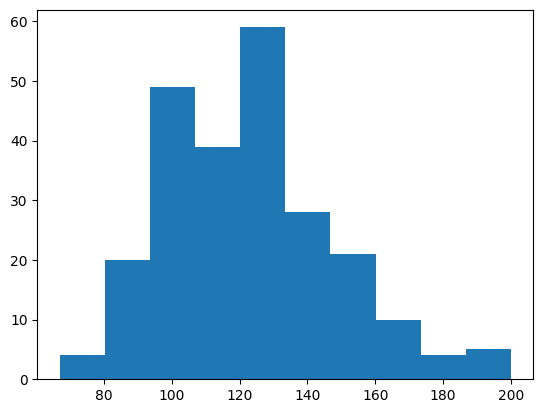

In [50]:
import numpy as np
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(t_array)
plt.show()

In [ ]:
print(t_array.size)

In [ ]:
#Tutorial for Genius
'''from lyricsgenius import Genius
token = 'Wbdl4zQaphgb0HpfLCqJuhJWNU2B2m7NDXTh3oN9TE5bmM77K1fS68czEbS_wSHy'
genius = Genius(token)
artist = genius.search_artist("Andy Shauf", max_songs=3, sort="title")
print(artist.songs)
# Way 1
song = genius.search_song("To You", artist.name)

# Way 2
# this will search artist.songs first
# and if not found, uses search_song
song = artist.song("To You")

print(song.lyrics)'''


In [ ]:
#Test for bpm API, does not work
key= '0bf7106cdcb361896dd1cbf071ff715e'
url_bpm = 'https://api.getsongbpm.comsong/?api_key='+key
url_song = "https://api.getsongbpm.com/song/?api_key="+key+"&id=983pB"
response = requests.get(url_song)
#json_data = json.loads(response.content)
print(response)